In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, losses
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Layer
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
class Encoder(Layer):
    def __init__(self, filters=16, kernel_size=3, strides=2, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
    
    def build(self, input_shape):
        self.conv2d = Conv2D(self.filters, self.kernel_size, activation='relu', padding='same', strides=self.strides)
    
    def call(self, inputs):
        x = self.conv2d(inputs)
        return x

In [5]:
class Decoder(Layer):
    def __init__(self, filters=16, kernel_size=3, strides=2, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
    
    def build(self, input_shape):
        self.conv2dtranspose = Conv2DTranspose(self.filters, kernel_size=self.kernel_size, strides=self.strides, activation='relu', padding='same')
        self.conv2d = Conv2D(3, kernel_size=self.kernel_size, activation='sigmoid', padding='same')
    
    def call(self, inputs):
        x = self.conv2dtranspose(inputs)
        x = self.conv2d(x)
        return x

In [6]:
class AutoEncoder(Model):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = Encoder(filters=16, kernel_size=3, strides=2, name="encoder")
        self.decoder = Decoder(filters=16, kernel_size=3, strides=2, name="decoder")
    
    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

In [7]:
autoencoder = AutoEncoder(name="autoencoder")

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0047 - val_loss: 0.0012
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0010 - val_loss: 9.1074e-04
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 8.8116e-04 - val_loss: 8.1863e-04
Epoch 4/10
1563/1563 [==============================] - 34s 21ms/step - loss: 7.9475e-04 - val_loss: 7.2840e-04
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 7.2082e-04 - val_loss: 7.2768e-04
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 6.6038e-04 - val_loss: 6.1234e-04
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 6.2228e-04 - val_loss: 5.8291e-04
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 5.9620e-04 - val_loss: 5.7738e-04
Epoch 9/10
1563/1563 [==============================] - 34s 21ms/step - loss: 5.7504e-04 - val_loss: 5.4892e-04
Epoc

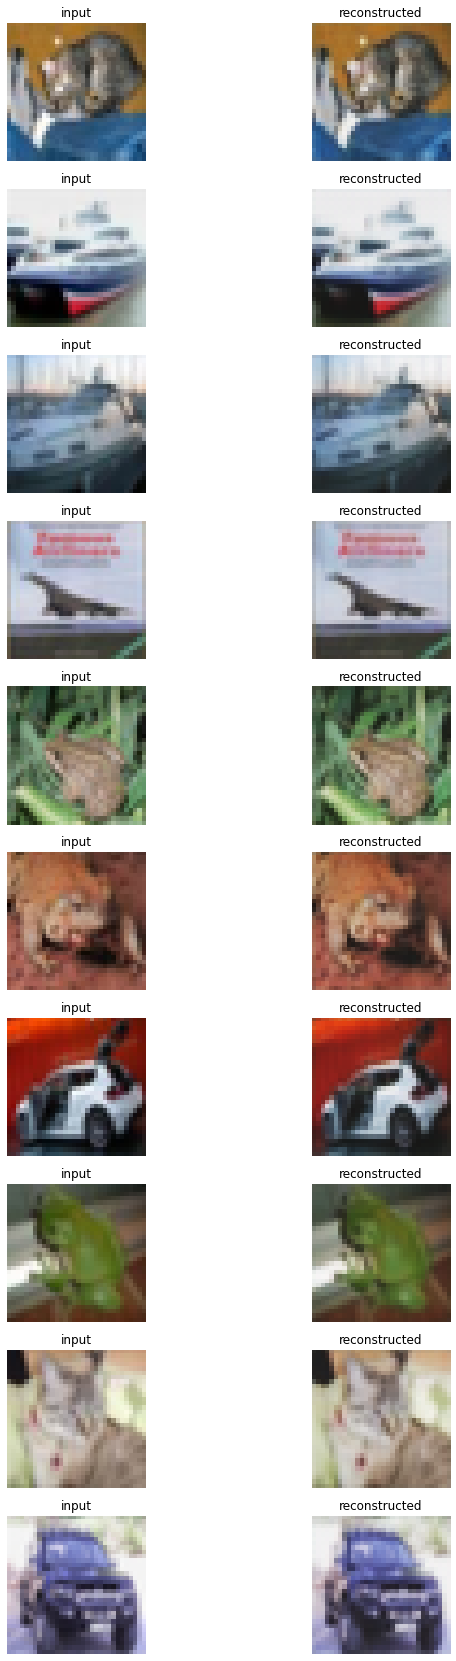

In [10]:
fig = plt.figure(figsize=(10, 30))
for i in range(10):
    ax1 = fig.add_subplot(10, 2, 2 * i + 1)
    ax2 = fig.add_subplot(10, 2, 2 * i + 2)
    ax1.axis('off')
    ax1.imshow(x_test[i])
    ax1.set_title('input')
    x = tf.expand_dims(x_test[i], 0)
    predicted = autoencoder.predict(x)
    ax2.axis('off')
    ax2.imshow(predicted[0])
    ax2.set_title('reconstructed')
plt.show()